In [1]:
import numpy as np
import pandas as pd 

In [2]:
from sklearn.datasets import load_iris

In [3]:
data=load_iris()

In [4]:
dir(data)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [5]:
feature=np.array(data.data)
feature[:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [6]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
target=np.array(data.target)
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [8]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(feature,target,test_size=0.2,random_state=42,stratify=target)

In [9]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.layers import Dense

In [10]:
# Model
model = models.Sequential([
    layers.Dense(16, activation='relu', input_shape=(4,)),
    layers.Dense(12, activation='relu'),
    layers.Dense(3, activation='softmax')
])

D:\anaconda\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.compile(optimizer=optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │              80 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 12)                  │             204 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │              39 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 323 (1.26 KB)

 Trainable params: 323 (1.26 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [14]:
# Train
history = model.fit(xtrain, ytrain, validation_split=0.2, epochs=50, batch_size=8, verbose=1)

Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.3229 - loss: 1.4025 - val_accuracy: 0.1667 - val_loss: 1.3015
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1875 - loss: 1.2056 - val_accuracy: 0.1667 - val_loss: 1.1095
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2500 - loss: 1.0554 - val_accuracy: 0.2917 - val_loss: 1.1266
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5208 - loss: 1.0057 - val_accuracy: 0.5417 - val_loss: 1.0189
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5625 - loss: 0.9489 - val_accuracy: 0.5833 - val_loss: 0.9778
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5521 - loss: 0.9032 - val_accuracy: 0.5417 - val_loss: 0.9203
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5729 - loss: 0.8607 - val_accuracy: 0.5417 - val_loss: 0.8698
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5938 - loss: 0.8307 - val_accuracy: 0.5833 - val_loss

In [16]:
y_pred = model.predict(xtest)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


In [17]:
y_pred

array([[9.78559256e-01, 2.04043575e-02, 1.03647332e-03],
       [2.64247460e-03, 3.65040898e-01, 6.32316649e-01],
       [5.26263416e-02, 8.26147854e-01, 1.21225834e-01],
       [5.26545458e-02, 8.33613873e-01, 1.13731638e-01],
       [9.82613981e-01, 1.65240858e-02, 8.61836888e-04],
       [8.47098604e-03, 6.76565647e-01, 3.14963400e-01],
       [9.94841635e-01, 4.86433320e-03, 2.94046680e-04],
       [9.82096314e-01, 1.74411554e-02, 4.62528231e-04],
       [1.38669997e-03, 2.85035431e-01, 7.13577867e-01],
       [5.08030551e-03, 4.32365656e-01, 5.62554002e-01],
       [1.42999139e-04, 1.23833142e-01, 8.76023948e-01],
       [2.58072605e-03, 3.74744892e-01, 6.22674346e-01],
       [1.32959220e-04, 7.30639920e-02, 9.26803112e-01],
       [1.36214457e-02, 7.99705863e-01, 1.86672747e-01],
       [9.85577166e-01, 1.39225647e-02, 5.00284426e-04],
       [9.87640202e-01, 1.19100222e-02, 4.49751562e-04],
       [9.97776330e-01, 2.15419778e-03, 6.94302435e-05],
       [2.11615134e-02, 8.24129

In [18]:
y_pred = y_pred.argmax(axis=-1)

In [19]:
y_pred

array([0, 2, 1, 1, 0, 1, 0, 0, 2, 2, 2, 2, 2, 1, 0, 0, 0, 1, 1, 2, 0, 2,
       1, 2, 2, 1, 1, 0, 2, 0])

In [21]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,y_pred)

0.9666666666666667

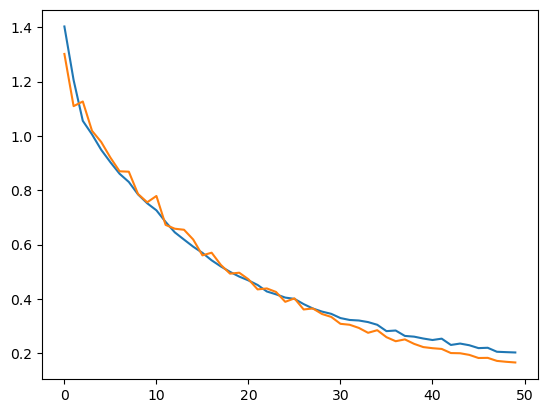

In [22]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

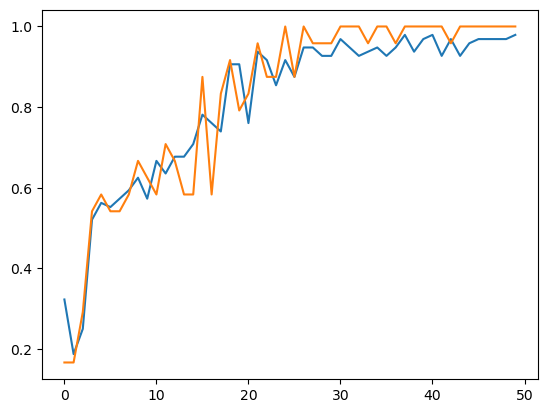

In [23]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])